# Standardised Precipitation-Evapotranspiration Index (SPEI)


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("SPEI.csv").convert_dtypes()

### Rows and columns 

In [3]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 29


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

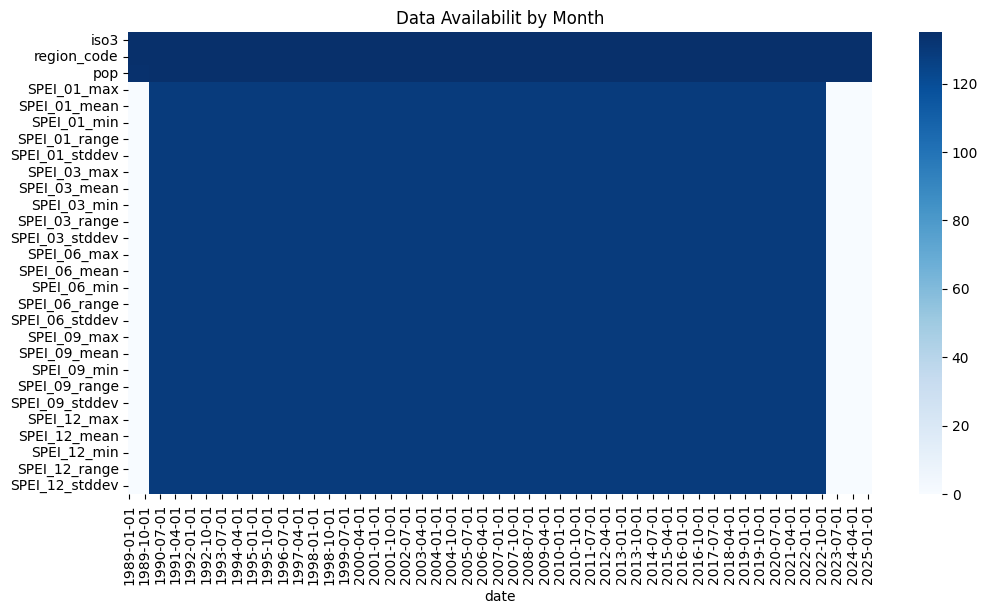

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2001-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [6]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
SPEI_01_max,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_01_mean,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_01_min,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_01_range,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_01_stddev,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_03_max,<NA>,<NA>,<NA>,<NA>,<NA>
SPEI_03_mean,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso3            58725 non-null  string 
 1   region_code     58725 non-null  string 
 2   pop             58713 non-null  Float64
 3   SPEI_01_max     51084 non-null  Float64
 4   SPEI_01_mean    51084 non-null  Float64
 5   SPEI_01_min     51084 non-null  Float64
 6   SPEI_01_range   51084 non-null  Float64
 7   SPEI_01_stddev  51084 non-null  Float64
 8   SPEI_03_max     51084 non-null  Float64
 9   SPEI_03_mean    51084 non-null  Float64
 10  SPEI_03_min     51084 non-null  Float64
 11  SPEI_03_range   51084 non-null  Float64
 12  SPEI_03_stddev  51084 non-null  Float64
 13  SPEI_06_max     51084 non-null  Float64
 14  SPEI_06_mean    51084 non-null  Float64
 15  SPEI_06_min     51084 non-null  Float64
 16  SPEI_06_range   51084 non-null  Float64
 17  SPEI_06_stddev  51084 

### Descriptive statistics of categorical columns

In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
SPEI_01_max,51084.0,0.942708,1.11352,-3.725553,0.17425,0.979276,1.757363,8.125891
SPEI_01_mean,51084.0,-0.134104,0.869235,-4.351667,-0.714539,-0.114477,0.407509,3.560676
SPEI_01_min,51084.0,-1.207055,1.142219,-11.40156,-1.947312,-1.306849,-0.435687,3.225823
SPEI_01_range,51084.0,2.149763,1.506636,0.0,0.952172,2.018753,3.122484,15.334757
SPEI_01_stddev,51084.0,0.491187,0.321375,0.0,0.242765,0.464232,0.705829,2.960919
SPEI_03_max,51084.0,0.912374,1.103561,-3.312341,0.158974,0.95156,1.706859,7.514137
SPEI_03_mean,51084.0,-0.173206,0.861213,-3.445659,-0.750477,-0.160633,0.366258,3.254489
SPEI_03_min,51084.0,-1.21017,1.056497,-8.019492,-1.948015,-1.327544,-0.518982,2.824461
SPEI_03_range,51084.0,2.122544,1.413362,0.0,1.005081,2.007999,3.046819,12.982632


### Deatils of missing values in the features

In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
SPEI_01_max,7641,13.01
SPEI_01_range,7641,13.01
SPEI_01_min,7641,13.01
SPEI_01_mean,7641,13.01
SPEI_03_max,7641,13.01
SPEI_03_mean,7641,13.01
SPEI_03_min,7641,13.01
SPEI_01_stddev,7641,13.01
SPEI_03_range,7641,13.01
SPEI_06_mean,7641,13.01


In [11]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [12]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

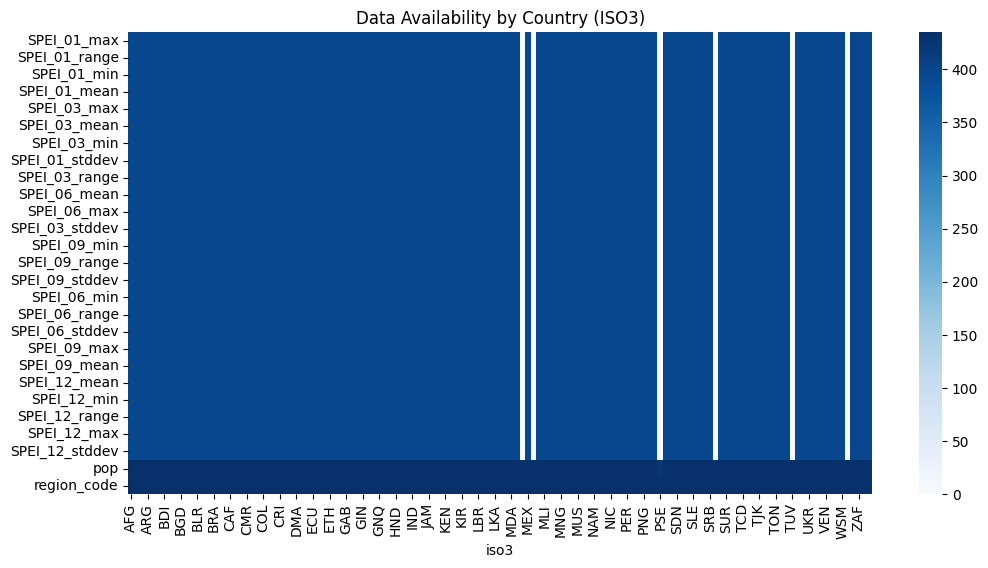

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

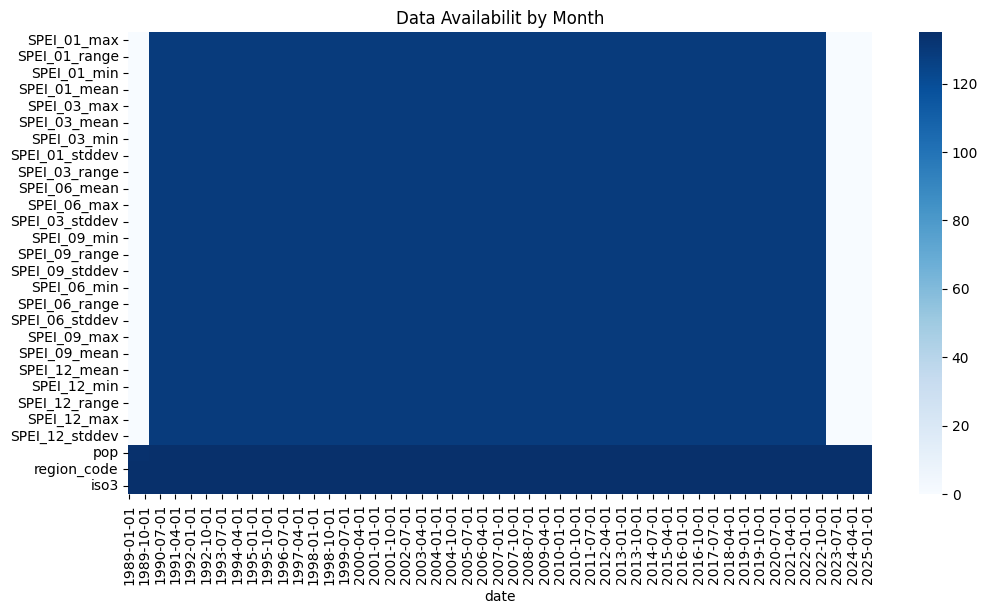

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [15]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

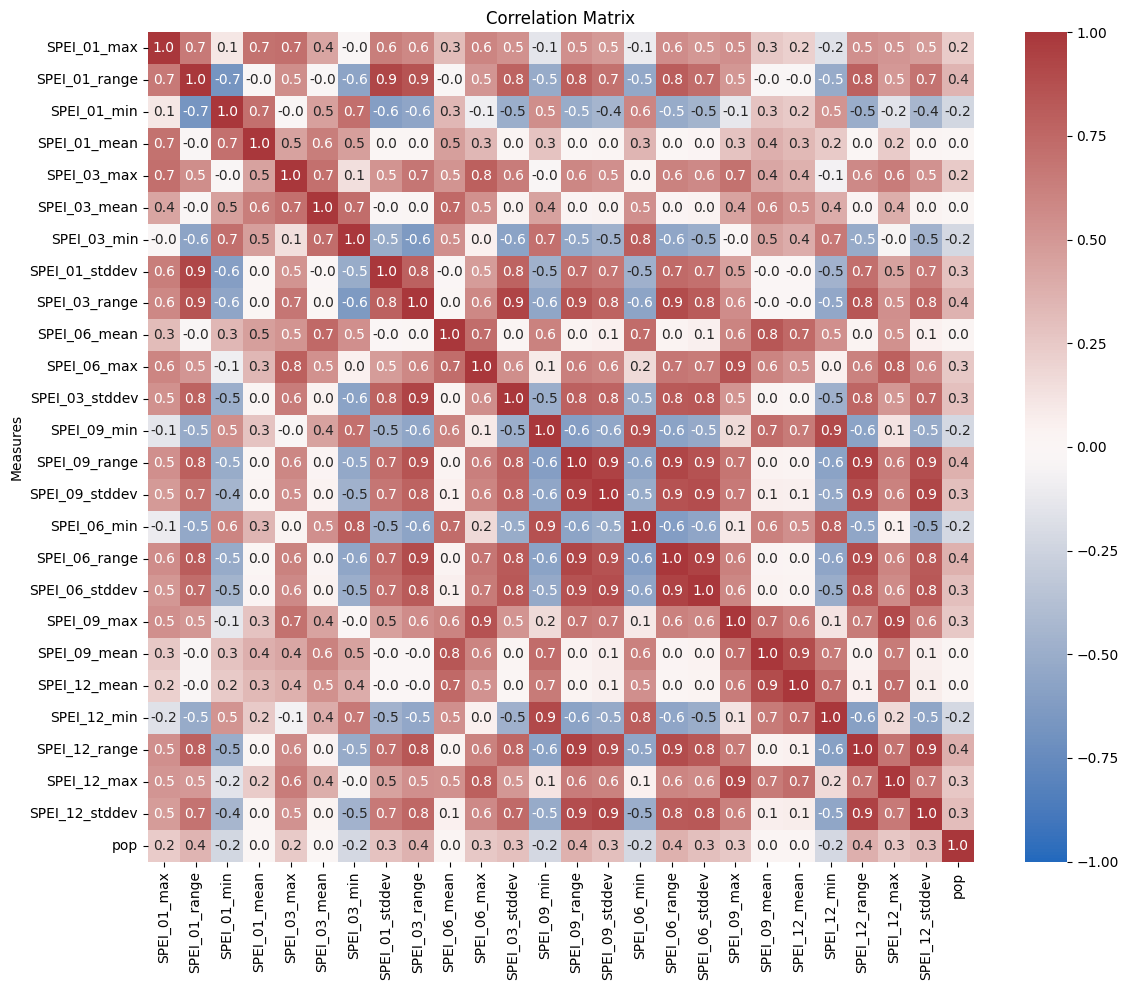

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [17]:
numeric_df.shape

(51084, 26)

### Principal Components Analysis of the features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 2
Column names for PCA components: ['PC1', 'PC2']


In [19]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [20]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

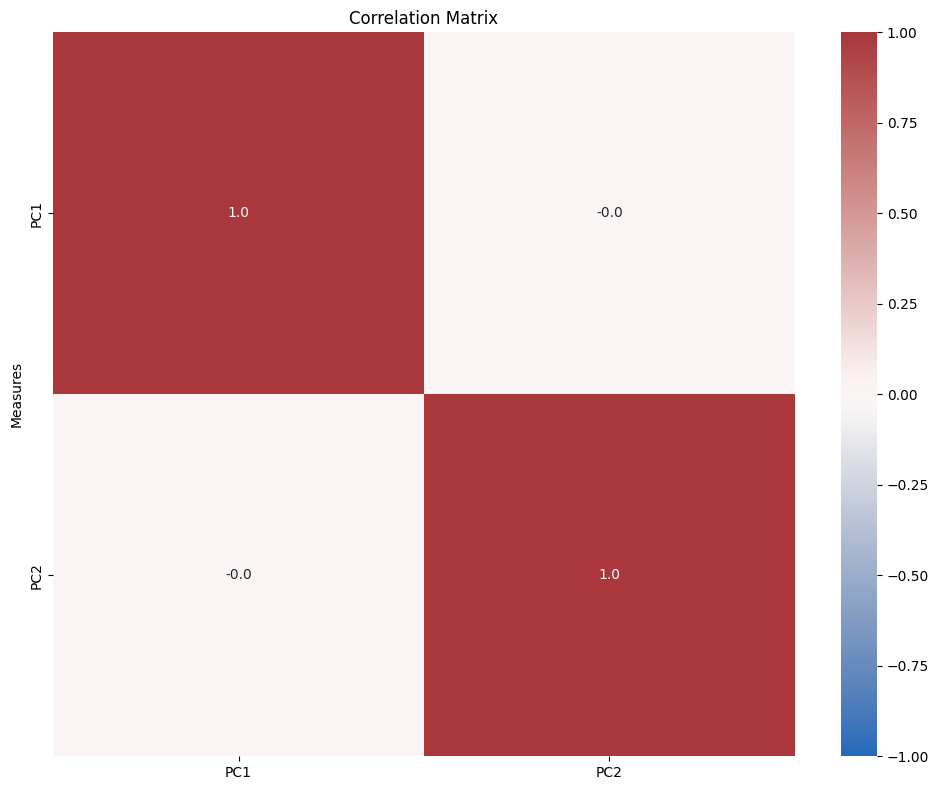

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

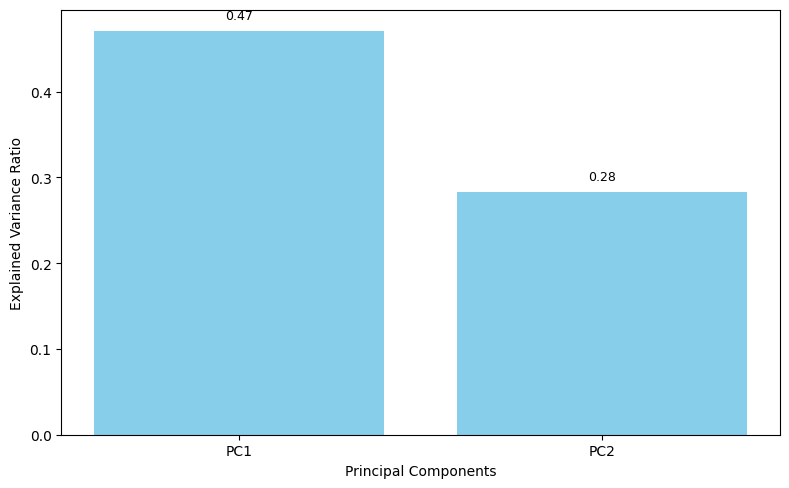

In [22]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.7540


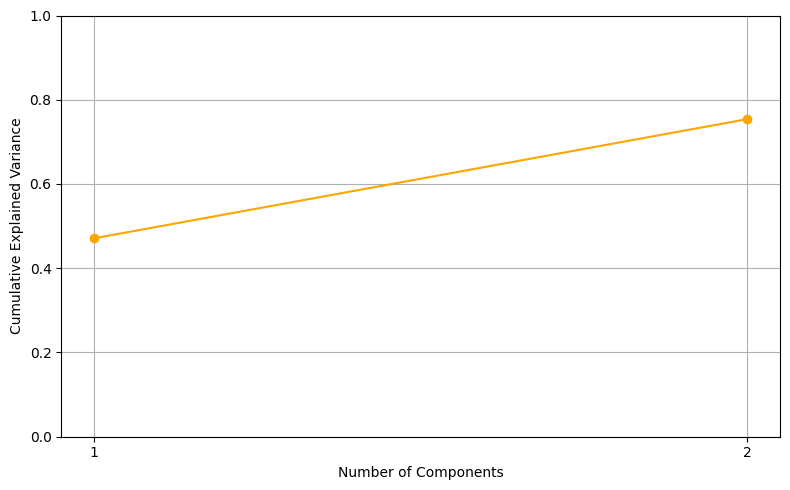

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

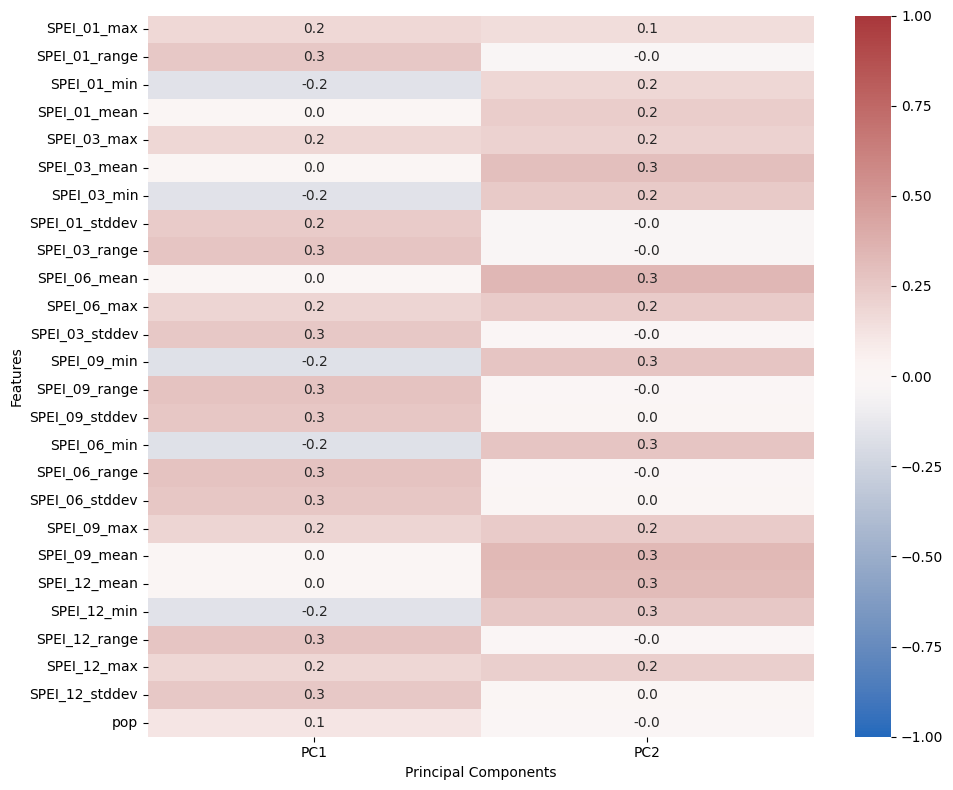

In [25]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [26]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                 PC1   PC2
SPEI_01_max     0.18  0.15
SPEI_01_range   0.25 -0.03
SPEI_01_min    -0.16  0.18
SPEI_01_mean    0.01  0.23
SPEI_03_max     0.19  0.21
SPEI_03_mean    0.01  0.30
SPEI_03_min    -0.16  0.24
SPEI_01_stddev  0.24 -0.02
SPEI_03_range   0.27 -0.02
SPEI_06_mean    0.01  0.34
SPEI_06_max     0.19  0.24
SPEI_03_stddev  0.25 -0.01
SPEI_09_min    -0.17  0.27
SPEI_09_range   0.27 -0.00
SPEI_09_stddev  0.26  0.01
SPEI_06_min    -0.17  0.27
SPEI_06_range   0.27 -0.01
SPEI_06_stddev  0.26  0.00
SPEI_09_max     0.19  0.24
SPEI_09_mean    0.01  0.33
SPEI_12_mean    0.01  0.31
SPEI_12_min    -0.16  0.25
SPEI_12_range   0.27 -0.00
SPEI_12_max     0.18  0.23
SPEI_12_stddev  0.26  0.01
pop             0.11 -0.00


## Physical Interpretation

### PC1- Drought Variability Index, PC1 clearly captures interannual drought intensity variability, i.e., how extreme and spread out the dry/wet conditions are over time.

### PC2- Mean Moisture Condition Index, PC2 captures average moisture balance across multiple time scales.
